In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import textblob
from textblob import TextBlob #FOR ERROR CORRECTION

In [2]:
#SAMPLE TEXT SET
#sample = open('train_E6oV3lV.csv').read()
#THIS IS ALREADY A LABELLED DATASET WITH v1,v2, , , AS 5 LABLES
rawdata = open('spam.csv', encoding = "ISO-8859-1").read()
rawdata[:500]


'v1,v2,,,\nham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,\nham,Ok lar... Joking wif u oni...,,,\nspam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s,,,\nham,U dun say so early hor... U c already then say...,,,\nham,"Nah I don\'t think he goes to usf, he lives around here though",,,\nspam,"FreeMsg Hey there darling it\'s been'

In [3]:
#USING PANDAS TO CLEAN 
#INCASE THE DATASET WASN'T LABELLED WE COULD HAVE USED THIS
#data = pd.read_csv('spam.csv',sep='\t ', names= ['label','body_text'],header = None,engine='python')
data = pd.read_csv("spam.csv", encoding = 'latin-1')
data.columns = ["category","message","","",""]
data = data.drop(labels = ["","",""],axis=1)
data.head(10)

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


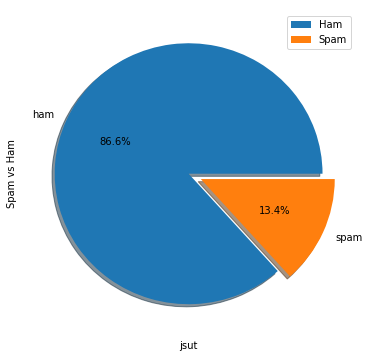

In [4]:
#ANALYZING THE DATASET
data["category"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.xlabel("jsut")
plt.legend(["Ham", "Spam"])
plt.show()

In [5]:
#REMOVING PUNCATUATIONS
print(string.punctuation)
def remove_punct(text):
    #REMOVING PUNCTUCATION
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    
    #EDITING IT TO ADD LOWER FUNCITION TOO
    text_nopunct = text_nopunct.lower()
    
    text_nopunct = word_tokenize(text_nopunct)
    return text_nopunct


data['message_nopunct'] = data['message'].apply(lambda x:remove_punct(x))
print(data.head(10))



!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
  category                                            message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   
5     spam  FreeMsg Hey there darling it's been 3 week's n...   
6      ham  Even my brother is not like to speak with me. ...   
7      ham  As per your request 'Melle Melle (Oru Minnamin...   
8     spam  WINNER!! As a valued network customer you have...   
9     spam  Had your mobile 11 months or more? U R entitle...   

                                     message_nopunct  
0  [go, until, jurong, point, crazy, available, o...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, in, 2, a, wkly, comp, to, win, f...  
3  [u, dun, say, so, early, hor

In [6]:
#REMOVING STOPWORDS
#NLTK ALREADY CONTAINS STOPWORDS
stopwords = nltk.corpus.stopwords.words('english')
#APPEND IF MORE STOPWORDS ARE REQUIRED
stopwords.append('ok')
print(stopwords)
def remove_stop_words(tokenized_list):
    temp = [words for words in tokenized_list if words not in stopwords]
    return temp
    
data['message_sw'] = data['message_nopunct'].apply(lambda x : remove_stop_words(x))
print(data.head())

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
#STEMMING : REDUCING WORDS TO ITS BASIC VERSION ex:running -> run
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
data['STEM'] = data['message_sw'].apply(lambda x: stemming(x))
print(data.head(5))

  category                                            message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                     message_nopunct  \
0  [go, until, jurong, point, crazy, available, o...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3  [u, dun, say, so, early, hor, u, c, already, t...   
4  [nah, i, dont, think, he, goes, to, usf, he, l...   

                                          message_sw  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                         [lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, 

In [8]:
#LEMMATISING -FINDING THE ROOT FORM
wn = nltk.WordNetLemmatizer()
def lemmatising(text):
    text = [wn.lemmatize(word) for word in text]
    return text
data['LEMMA'] = data['message_sw'].apply(lambda x: lemmatising(x))
print(data.head())

  category                                            message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                     message_nopunct  \
0  [go, until, jurong, point, crazy, available, o...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3  [u, dun, say, so, early, hor, u, c, already, t...   
4  [nah, i, dont, think, he, goes, to, usf, he, l...   

                                          message_sw  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                         [lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, 

In [9]:
#BAG OF WORDS
count_vec = CountVectorizer()
X_count = count_vec.fit_transform(data['message'])
#print(X_count.shape) (5572, 8672)
#THIS MEANS 8672 DIFFERENT WORDS AND 5572 ROWS OF TEXTS

#N_gram MODELS ->SUPPOSE A BIGRAM MODEL ->TAKES ALL POSSIBILITIES OF ADJECENT WORDS TO  PREDICT CONTEXT WORDS.
n_gramvector = CountVectorizer(ngram_range=(2,2))
X_count = n_gramvector.fit_transform(data['message'])
#print(X_count.shape) (5572, 41654)
#print(n_gramvector.get_feature_names())

In [10]:
#TFIDF MATRIX ->CALCULATES RELATIVE FREQUENCY
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
X_vect = tfidf_vect.fit_transform(data['message'])
#print(X_vect.shape)  (5572, 8672)
#print(tfidf_vect.get_feature_names())

In [11]:
#REMOVEL OF COMMON WORDS
freq = pd.Series(' '.join(data['message']).split()).value_counts()[:10]
#freq

In [12]:
data1 = list(data.index)
data['message'] = data['message'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['message'].head()


0    Go until jurong point, crazy.. Available only ...
1                          Ok lar... Joking wif oni...
2    Free entry 2 wkly comp win FA Cup final tkts 2...
3    U dun say so early hor... U c already then say...
4    Nah don't think he goes usf, he lives around h...
Name: message, dtype: object

In [13]:
#THIS IS TEXT CORRECTION AND ITS TAKING A LOT OF TIME SO I DIDN'T DO IT
#data['message_correct'] = data['message'].apply(lambda x: str(TextBlob(x).correct()))
#print(data['message'].head(15))


#SENTIMENT ANALYSIS
data['sentiment'] = data['message'].apply(lambda x: TextBlob(x).sentiment[0] )
print(data.head())  #1 means +ve and 0 is -ve

  category                                            message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                        Ok lar... Joking wif oni...   
2     spam  Free entry 2 wkly comp win FA Cup final tkts 2...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah don't think he goes usf, he lives around h...   

                                     message_nopunct  \
0  [go, until, jurong, point, crazy, available, o...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3  [u, dun, say, so, early, hor, u, c, already, t...   
4  [nah, i, dont, think, he, goes, to, usf, he, l...   

                                          message_sw  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                         [lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, 

In [18]:
#WORD EMBEDDINGS
#DON'T RUN THIS AGAIN AND AGAIN TAKES TIME
#the two files are needed in the same directory
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

from gensim.models import KeyedVectors # load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [25]:
#model['happy']  #EMBEDDING VECTOR OF ANY WORD
result = model.most_similar(positive=['man', 'scientist'], negative=['women'], topn=1)
print(result)

#WORD EMBEDDING MODEL HAS A LOT MORE FEATURES 

[('physicist', 1.1379300355911255)]


In [2]:
import nltk
from nltk import *
sta = StanfordPOSTagger('english-bidirectional-distsim.tagger','stanford-postagger.jar')
print( sta.tag(("You will not be able to escape the wrath of the dragon").split()))
text = word_tokenize("You will not be able to escape the wrath of the dragon")
print( pos_tag(text))
def GetPOSTags(text):
#         text = word_tokenize(text)
#         return pos_tag(text)
          sta = StanfordPOSTagger('english-bidirectional-distsim.tagger','stanford-postagger.jar')
          output = sta.tag(text.split())
          return output

[('You', 'PRP'), ('will', 'MD'), ('not', 'RB'), ('be', 'VB'), ('able', 'JJ'), ('to', 'TO'), ('escape', 'VB'), ('the', 'DT'), ('wrath', 'NN'), ('of', 'IN'), ('the', 'DT'), ('dragon', 'NN')]
[('You', 'PRP'), ('will', 'MD'), ('not', 'RB'), ('be', 'VB'), ('able', 'JJ'), ('to', 'TO'), ('escape', 'VB'), ('the', 'DT'), ('wrath', 'NN'), ('of', 'IN'), ('the', 'DT'), ('dragon', 'NN')]


## Code after this line is testing of stanford NER and POS tagger and not really relevent

In [8]:
from nltk.tag import StanfordNERTagger
st = StanfordNERTagger('english.all.3class.distsim.crf.ser.gz','stanford-ner.jar',encoding='utf-8')

text = 'While in South East Asia, Christine Lagarde discussed short-term stimulus efforts in a recent interview with the Wall Street Journal at Washington Monument'

tokenized_text = word_tokenize(text)
classified_text = st.tag(tokenized_text)
finallist = {}
current = ""
# for chunk in classified_text:
#     if current
grammar = r"""
  FACILITY: {<FACILITY>*}  
  GPE: {<GPE>*}  
  GSP: {<LOCATION>*}  
  ORGANIZATION: {<ORGANIZATION>*}  
  PERSON: {<PERSON>*}  
     
"""

cp = nltk.RegexpParser(grammar)
result = cp.parse(classified_text)
print(result)


#print(tree)

ner_tags = {}
for sent in nltk.sent_tokenize(text):
    for chunk in nltk.ne_chunk(GetPOSTags(text)):
        if hasattr(chunk, 'label'):
            word = (' '.join(c[0] for c in chunk))
            ner_tags[word] = chunk.label()
print(ner_tags)
print(nltk.ne_chunk(GetPOSTags(text)))

(S
  While/O
  in/O
  (GSP South/LOCATION East/LOCATION Asia/LOCATION)
  ,/O
  (PERSON Christine/PERSON Lagarde/PERSON)
  discussed/O
  short-term/O
  stimulus/O
  efforts/O
  in/O
  a/O
  recent/O
  interview/O
  with/O
  the/O
  (ORGANIZATION
    Wall/ORGANIZATION
    Street/ORGANIZATION
    Journal/ORGANIZATION)
  at/O
  (GSP Washington/LOCATION Monument/LOCATION))
{'South East': 'GPE', 'Christine Lagarde': 'PERSON', 'Wall Street Journal': 'FACILITY', 'Washington': 'ORGANIZATION'}
(S
  While/IN
  in/IN
  (GPE South/NNP East/NNP)
  Asia,/NNP
  (PERSON Christine/NNP Lagarde/NNP)
  discussed/VBD
  short-term/JJ
  stimulus/NN
  efforts/NNS
  in/IN
  a/DT
  recent/JJ
  interview/NN
  with/IN
  the/DT
  (FACILITY Wall/NNP Street/NNP Journal/NNP)
  at/IN
  (ORGANIZATION Washington/NNP)
  Monument/NNP)


In [1]:
import re
from nltk.tag import StanfordNERTagger
text = 'While in Midlothian, Christine Saharsh Lagarde discussed short-term stimulus efforts in a recent interview with the Wall Street Journal at Stonehenge'
text = 'we will go to Stonehenge tommorow'
ner_tagger = StanfordNERTagger('english.all.3class.distsim.crf.ser.gz','stanford-ner.jar',encoding='utf-8')
tokenized_text = word_tokenize(text)
classified_text = ner_tagger.tag(tokenized_text)
finallist = {}


nltk.ne_chunk(GetPOSTags(text))

grammar = r"""
  FACILITY: {<FACILITY>*}  
  GSP: {<GSP>*}  
  LOCATION: {<LOCATION>*}
  GPE: {<GPE>*}  
  ORGANIZATION: {<ORGANIZATION>*}  
  PERSON: {<PERSON>*}     
"""

cp = nltk.RegexpParser(grammar)
result = cp.parse(classified_text)
print(result.draw())


pat=re.compile("/[a-zA-Z]*[\s]|/.*[)]|[(]")
s= ""
count = 0
for chunk in result:
    s = str(chunk[0])
    if(s[0]=='('):
        s = str(chunk)
        ns=pat.sub(" ",s)
        #print(s)
        #print(ns)
        temp1 = word_tokenize(ns)
        #print(temp1)
        temps = ""
        for i in range(1,len(temp1)):
            temps += temp1[i] + " "
        temps = temps[ : len(temps)-1]
        finallist[temps] = temp1[0]
print(finallist)
            

            
           
        


/home/saharsh/anaconda3/lib/python3.6/site-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


LookupError: Could not find stanford-ner.jar jar file at stanford-ner.jar